In [1]:
#import libraries
import warnings
import pandas as  pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle
warnings.filterwarnings('ignore')
import math

In [2]:
#importing a dataset

data = pd.read_csv('D:\BTech\Final Year project\YT\kidney_disease.csv')

In [3]:
data


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48,80,1.020,1,0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7,50,1.020,4,0,normal,normal,notpresent,notpresent,...,38,6000,3.9,no,no,no,good,no,no,ckd
2,2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,4.6,no,yes,no,poor,no,yes,ckd
3,3,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,4.4,yes,no,no,poor,yes,yes,ckd
4,4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,5,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,243,23,80,1.025,0,0,normal,normal,notpresent,notpresent,...,44,7300,4.9,yes,no,no,good,no,no,ckd
244,244,45,60,1.025,0,0,normal,normal,present,notpresent,...,45,9400,6.4,yes,yes,no,good,no,yes,ckd
245,245,57,80,1.020,0,0,normal,normal,notpresent,notpresent,...,48,9600,5.6,yes,no,yes,poor,no,no,ckd
246,246,51,80,1.020,0,0,normal,normal,present,notpresent,...,52,9900,5.2,yes,no,yes,good,no,yes,ckd


In [4]:
data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48,80,1.020,1,0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7,50,1.020,4,0,normal,normal,notpresent,notpresent,...,38,6000,3.9,no,no,no,good,no,no,ckd
2,2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,4.6,no,yes,no,poor,no,yes,ckd
3,3,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,4.4,yes,no,no,poor,yes,yes,ckd
4,4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,5,no,no,no,good,no,no,ckd


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              248 non-null    int64  
 1   age             248 non-null    int64  
 2   bp              248 non-null    int64  
 3   sg              248 non-null    float64
 4   al              248 non-null    int64  
 5   su              248 non-null    int64  
 6   rbc             248 non-null    object 
 7   pc              248 non-null    object 
 8   pcc             248 non-null    object 
 9   ba              248 non-null    object 
 10  bgr             248 non-null    int64  
 11  bu              248 non-null    float64
 12  sc              248 non-null    float64
 13  sod             248 non-null    float64
 14  pot             248 non-null    float64
 15  hemo            248 non-null    float64
 16  pcv             248 non-null    object 
 17  wc              248 non-null    obj

In [6]:
#renaming the column

data.columns=['id','age','blood_pressure','specific_gravity','albumin','sugar',
              'red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood gulcose random',
              'blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume'
              ,'white_blood_cell_count','red_blood_cell_count','hypertension',
              'diabetesmellitus','coronary_artery_disease','appetite','pedal_edema',
              'anemia','class']


In [7]:
data.head(10)

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48,80,1.020,1,0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7,50,1.020,4,0,normal,normal,notpresent,notpresent,...,38,6000,3.9,no,no,no,good,no,no,ckd
2,2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,4.6,no,yes,no,poor,no,yes,ckd
3,3,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,4.4,yes,no,no,poor,yes,yes,ckd
4,4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,5,no,no,no,good,no,no,ckd
5,5,60,90,1.015,3,0,abnormal,normal,notpresent,notpresent,...,39,7800,4,yes,yes,no,good,yes,no,ckd
6,6,68,70,1.010,0,0,abnormal,abnormal,notpresent,notpresent,...,36,6900,3.7,no,no,no,good,no,no,ckd
7,7,24,100,1.015,2,4,normal,abnormal,notpresent,notpresent,...,44,9600,3.8,no,yes,no,good,yes,no,ckd
8,8,52,90,1.015,3,0,abnormal,abnormal,present,notpresent,...,33,12100,3.4,yes,yes,no,good,no,yes,ckd
9,9,53,60,1.020,2,0,normal,abnormal,present,notpresent,...,29,4500,2.6,yes,yes,no,poor,no,yes,ckd


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       248 non-null    int64  
 1   age                      248 non-null    int64  
 2   blood_pressure           248 non-null    int64  
 3   specific_gravity         248 non-null    float64
 4   albumin                  248 non-null    int64  
 5   sugar                    248 non-null    int64  
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 248 non-null    object 
 8   pus_cell_clumps          248 non-null    object 
 9   bacteria                 248 non-null    object 
 10  blood gulcose random     248 non-null    int64  
 11  blood_urea               248 non-null    float64
 12  serum_creatinine         248 non-null    float64
 13  sodium                   248 non-null    float64
 14  potassium                2

In [9]:
data.isnull().any()

id                         False
age                        False
blood_pressure             False
specific_gravity           False
albumin                    False
sugar                      False
red_blood_cells            False
pus_cell                   False
pus_cell_clumps            False
bacteria                   False
blood gulcose random       False
blood_urea                 False
serum_creatinine           False
sodium                     False
potassium                  False
hemoglobin                 False
packed_cell_volume         False
white_blood_cell_count     False
red_blood_cell_count       False
hypertension               False
diabetesmellitus           False
coronary_artery_disease    False
appetite                   False
pedal_edema                False
anemia                     False
class                      False
dtype: bool

In [10]:
data.drop('id',axis=1,inplace=True)

In [11]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood gulcose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48,80,1.020,1,0,normal,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,normal,normal,notpresent,notpresent,423,...,38,6000,3.9,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,117,...,31,7500,4.6,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,106,...,32,6700,4.4,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,74,...,35,7300,5,no,no,no,good,no,no,ckd


In [12]:
#Handling missing values

In [13]:
data['blood gulcose random'].fillna(data['blood gulcose random'].mean(),inplace=True)

In [14]:
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)

In [15]:
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)

In [16]:
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)

In [17]:
data['packed_cell_volume']  = pd.to_numeric(data['packed_cell_volume'],errors='coerce')

In [18]:
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)

In [19]:
data['potassium'].fillna(data['potassium'].mean(),inplace=True)

In [20]:
# converting object into float

# converting object into float



In [21]:
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')


In [22]:
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)

In [23]:
data['serum_creatinine'] = pd.to_numeric(data['serum_creatinine'], errors='coerce')

In [24]:
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)

In [25]:
data['sodium'].fillna(data['sodium'].mean(),inplace=True)

In [26]:
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors = 'coerce')

In [27]:
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

In [28]:
data['age'].fillna(data['age'].mode()[0],inplace=True)

In [29]:
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)

In [30]:
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)

In [31]:
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)

In [32]:
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)

In [33]:
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)

In [34]:
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)

In [35]:
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)

In [36]:
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)

In [37]:
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)

In [38]:
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)

In [39]:
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)

In [40]:
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)

In [41]:
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [42]:
data.head(25)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood gulcose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48,80,1.020,1,0,normal,normal,notpresent,notpresent,121,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,normal,normal,notpresent,notpresent,423,...,38.0,6000.0,3.9,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,117,...,31.0,7500.0,4.6,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,106,...,32.0,6700.0,4.4,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,74,...,35.0,7300.0,5.0,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,abnormal,normal,notpresent,notpresent,100,...,39.0,7800.0,4.0,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,abnormal,abnormal,notpresent,notpresent,410,...,36.0,6900.0,3.7,no,no,no,good,no,no,ckd
7,24,100,1.015,2,4,normal,abnormal,notpresent,notpresent,138,...,44.0,9600.0,3.8,no,yes,no,good,yes,no,ckd
8,52,90,1.015,3,0,abnormal,abnormal,present,notpresent,70,...,33.0,12100.0,3.4,yes,yes,no,good,no,yes,ckd
9,53,60,1.020,2,0,normal,abnormal,present,notpresent,490,...,29.0,4500.0,2.6,yes,yes,no,poor,no,yes,ckd


# checking the null values

In [43]:
data.dtypes

age                          int64
blood_pressure               int64
specific_gravity           float64
albumin                      int64
sugar                        int64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood gulcose random         int64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetesmellitus            object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
class                       object
dtype: object

In [44]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood gulcose random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

## handling categorical values

In [45]:
catcols=set(data.dtypes [data.dtypes== 'O' ].index.values)
print(catcols)


{'coronary_artery_disease', 'pus_cell_clumps', 'appetite', 'class', 'bacteria', 'pus_cell', 'hypertension', 'anemia', 'pedal_edema', 'diabetesmellitus', 'red_blood_cells'}


In [46]:
catcols

{'anemia',
 'appetite',
 'bacteria',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hypertension',
 'pedal_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells'}

In [47]:
for i in catcols:
  print("columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

columns: coronary_artery_disease
Counter({'no': 213, 'yes': 33, '\tno': 2})
************************************************************************************************************************

columns: pus_cell_clumps
Counter({'notpresent': 207, 'present': 41})
************************************************************************************************************************

columns: appetite
Counter({'good': 167, 'poor': 81})
************************************************************************************************************************

columns: class
Counter({'ckd': 246, 'ckd\t': 2})
************************************************************************************************************************

columns: bacteria
Counter({'notpresent': 226, 'present': 22})
************************************************************************************************************************

columns: pus_cell
Counter({'normal': 172, 'abnormal': 76})
**********************

In [48]:
catcols = ['anemia',
 'appetite',
 'bacteria',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hypertension',
 'pedal_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells']

In [49]:
from prompt_toolkit.shortcuts.progress_bar.formatters import Label
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("Label Encodings of :",i)
  LEi = LabelEncoder()
  print(c(data[i]))
  data[i] = LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

Label Encodings of : anemia
Counter({'no': 189, 'yes': 59})
Counter({0: 189, 1: 59})
****************************************************************************************************
Label Encodings of : appetite
Counter({'good': 167, 'poor': 81})
Counter({0: 167, 1: 81})
****************************************************************************************************
Label Encodings of : bacteria
Counter({'notpresent': 226, 'present': 22})
Counter({0: 226, 1: 22})
****************************************************************************************************
Label Encodings of : class
Counter({'ckd': 246, 'ckd\t': 2})
Counter({0: 246, 1: 2})
****************************************************************************************************
Label Encodings of : coronary_artery_disease
Counter({'no': 213, 'yes': 33, '\tno': 2})
Counter({1: 213, 2: 33, 0: 2})
****************************************************************************************************
Label Encodings o

In [50]:
data.dtypes

age                          int64
blood_pressure               int64
specific_gravity           float64
albumin                      int64
sugar                        int64
red_blood_cells              int32
pus_cell                     int32
pus_cell_clumps              int32
bacteria                     int32
blood gulcose random         int64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                 int32
diabetesmellitus             int32
coronary_artery_disease      int32
appetite                     int32
pedal_edema                  int32
anemia                       int32
class                        int32
dtype: object

In [51]:
contcols = set(data.dtypes[data.dtypes !='O'].index.values)
print(contcols)

{'coronary_artery_disease', 'potassium', 'albumin', 'age', 'packed_cell_volume', 'hypertension', 'sodium', 'anemia', 'blood_pressure', 'pus_cell_clumps', 'hemoglobin', 'appetite', 'bacteria', 'pus_cell', 'red_blood_cell_count', 'pedal_edema', 'white_blood_cell_count', 'blood gulcose random', 'serum_creatinine', 'blood_urea', 'class', 'sugar', 'specific_gravity', 'diabetesmellitus', 'red_blood_cells'}


In [52]:
for i in contcols:
  print("continous Columns:", i)
  print(c(data[i]))
  print('*'*120+'\n')

continous Columns: coronary_artery_disease
Counter({1: 213, 2: 33, 0: 2})
************************************************************************************************************************

continous Columns: potassium
Counter({4.9: 20, 5.0: 20, 4.7: 15, 4.0: 14, 3.5: 14, 4.2: 13, 3.8: 13, 4.1: 12, 3.9: 12, 4.4: 11, 4.5: 11, 4.3: 10, 4.8: 10, 3.7: 8, 4.6: 7, 3.4: 5, 5.2: 5, 3.6: 4, 5.7: 4, 5.3: 4, 3.2: 3, 5.5: 3, 2.9: 3, 5.4: 3, 6.3: 3, 2.5: 2, 5.8: 2, 5.9: 2, 5.6: 2, 3.0: 2, 6.5: 2, 6.4: 1, 6.6: 1, 39.0: 1, 7.6: 1, 47.0: 1, 5.1: 1, 2.8: 1, 2.7: 1, 3.3: 1})
************************************************************************************************************************

continous Columns: albumin
Counter({0: 93, 1: 44, 2: 43, 3: 43, 4: 24, 5: 1})
************************************************************************************************************************

continous Columns: age
Counter({60: 15, 65: 15, 48: 9, 50: 9, 54: 9, 62: 8, 45: 8, 59: 8, 68: 7, 61: 7, 70: 

In [53]:
contcols.remove('albumin')
contcols.remove('sugar')
contcols.remove('specific_gravity')
contcols

{'age',
 'anemia',
 'appetite',
 'bacteria',
 'blood gulcose random',
 'blood_pressure',
 'blood_urea',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hemoglobin',
 'hypertension',
 'packed_cell_volume',
 'pedal_edema',
 'potassium',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cell_count',
 'red_blood_cells',
 'serum_creatinine',
 'sodium',
 'white_blood_cell_count'}

In [54]:
catcols.append('specific_gravity')
catcols.append('sugar')
catcols.append('albumin')
catcols

['anemia',
 'appetite',
 'bacteria',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hypertension',
 'pedal_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells',
 'specific_gravity',
 'sugar',
 'albumin']

In [55]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'coronary_artery_disease', 'potassium', 'age', 'packed_cell_volume', 'hypertension', 'sodium', 'anemia', 'blood_pressure', 'pus_cell_clumps', 'hemoglobin', 'appetite', 'bacteria', 'pus_cell', 'red_blood_cell_count', 'pedal_edema', 'white_blood_cell_count', 'blood gulcose random', 'serum_creatinine', 'blood_urea', 'class', 'diabetesmellitus', 'red_blood_cells'}


In [56]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('tno','no')

In [57]:
data['diabetesmellitus'] = data.diabetesmellitus.replace('\tno','no')


In [58]:
data['diabetesmellitus'] = data.diabetesmellitus.replace('\tyes','yes')

In [59]:
c(data['coronary_artery_disease'])

Counter({1: 213, 2: 33, 0: 2})

In [60]:
c(data['diabetesmellitus'])

Counter({4: 132, 3: 110, 0: 3, 1: 2, 2: 1})

#describe used to find mean,mode,etc.

In [61]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood gulcose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,54.229839,79.475806,1.015302,1.451613,0.637097,0.810484,0.693548,0.165323,0.088710,166.250000,...,36.251012,8563.157895,4.630364,0.584677,3.475806,1.125000,0.326613,0.302419,0.237903,0.008065
std,17.377204,15.088384,0.005381,1.407642,1.261929,0.392711,0.461952,0.372223,0.284899,88.243601,...,8.585469,3085.472514,1.018219,0.493774,0.672944,0.354982,0.469923,0.460235,0.426661,0.089621
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,70.000000,1.010000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,104.000000,...,30.000000,6700.000000,3.900000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,80.000000,1.015000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,131.500000,...,36.000000,8300.000000,4.700000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,65.250000,90.000000,1.020000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,210.750000,...,42.000000,9800.000000,5.300000,1.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,53.000000,26400.000000,8.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='age', ylabel='Density'>

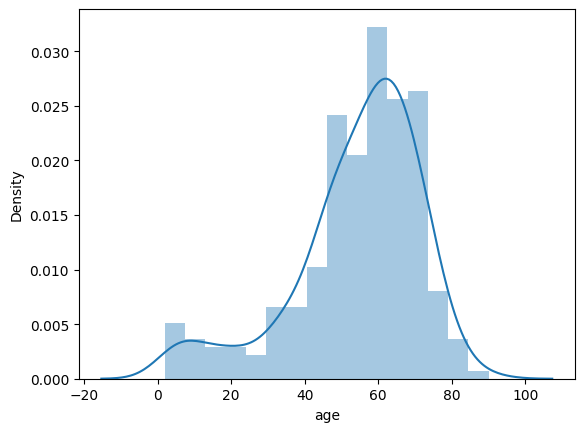

In [62]:
sns.distplot(data.age)

#BIVARIATE ANALYSIS

Text(0.5, 1.0, 'age vs Blood_pressure')

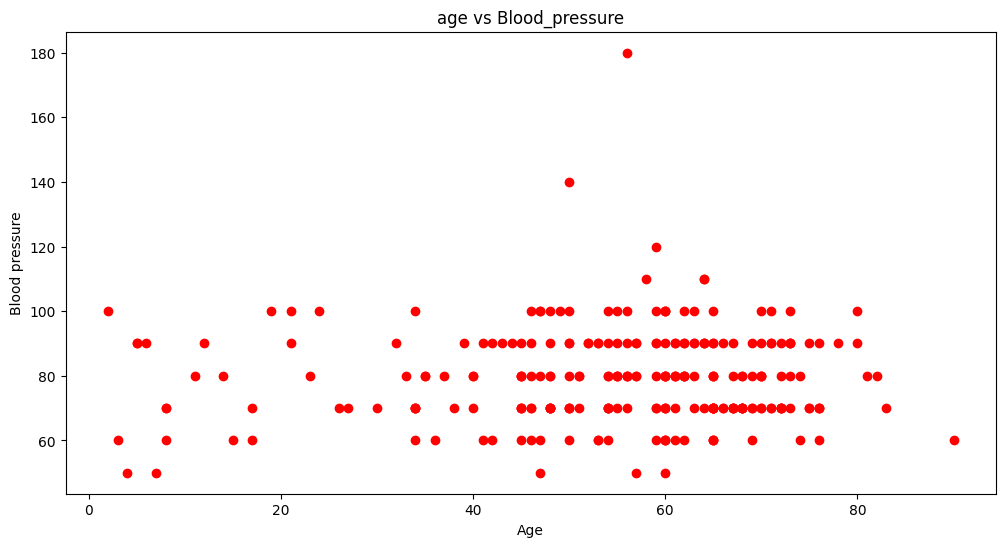

In [63]:
fig=plt.figure(figsize =(12,6))
plt.scatter(data['age'],data['blood_pressure'],color='r')
plt.xlabel('Age')
plt.ylabel('Blood pressure')
plt.title("age vs Blood_pressure")

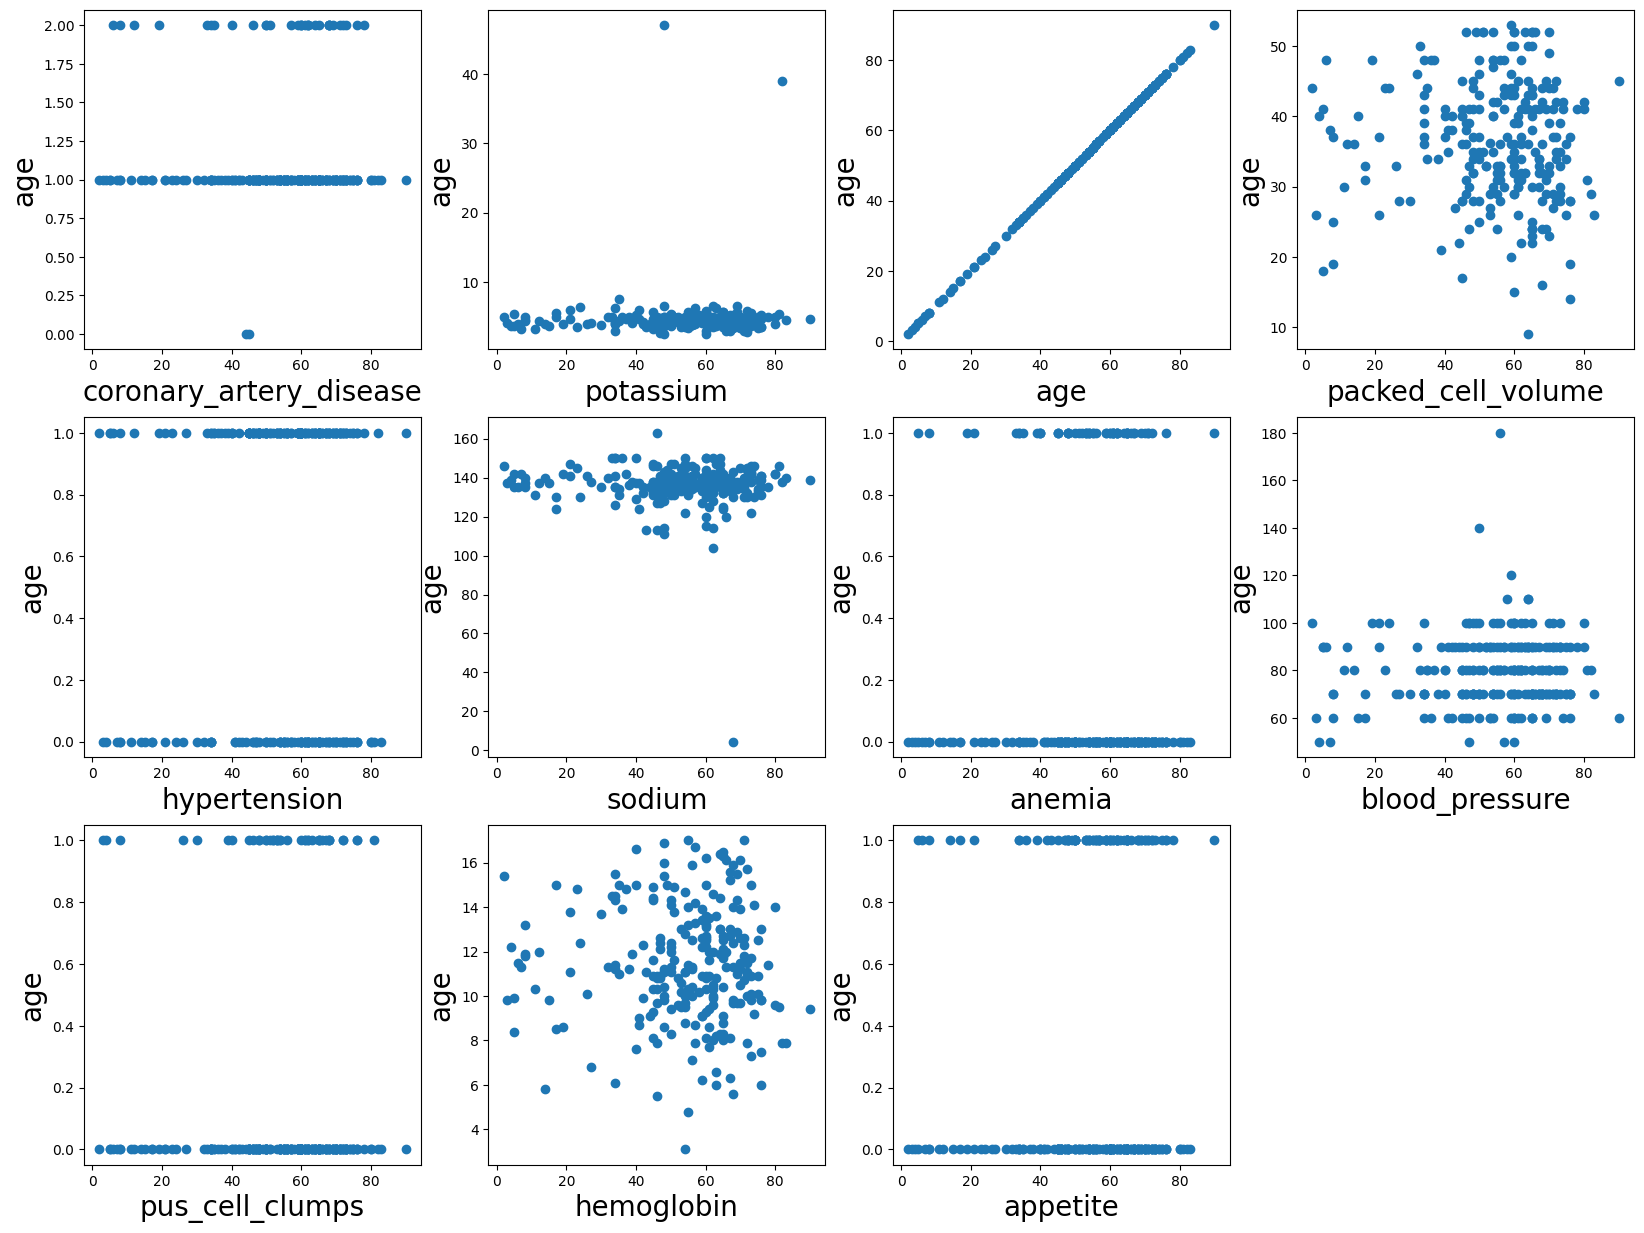

In [64]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber = 1

for column in contcols:
  if plotnumber<=11:
    ax = plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('age',fontsize=20)
  plotnumber+=1
plt.show()


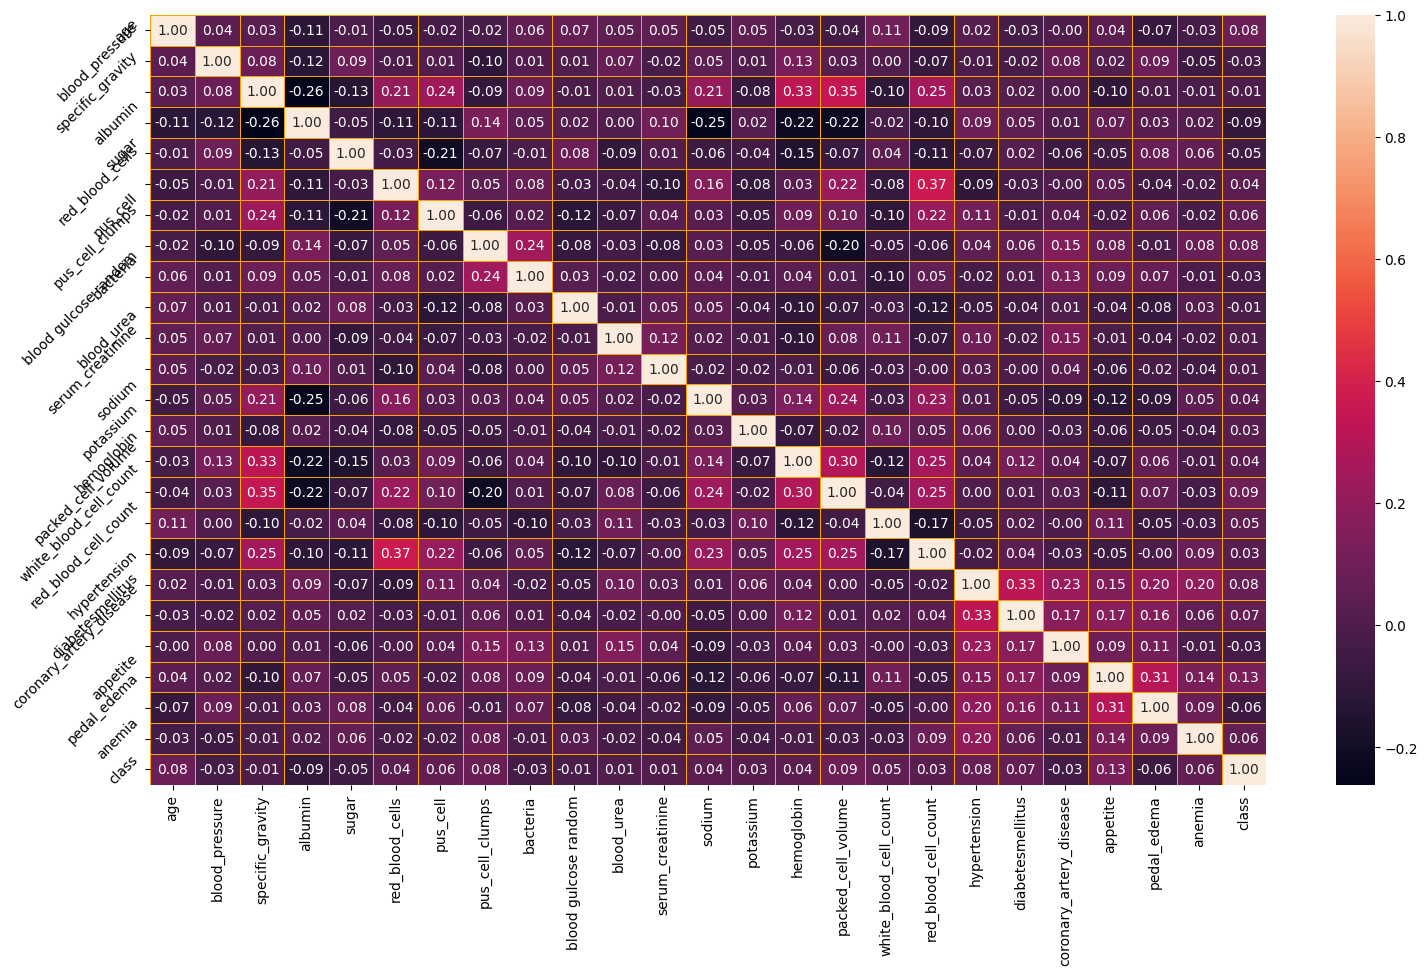

In [65]:
f,ax =plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

<Axes: ylabel='count'>

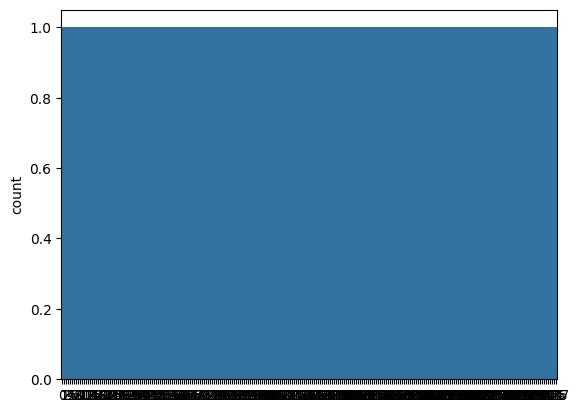

In [66]:
sns.countplot(data['class'])

In [67]:
selcols = ['red_blood_cells','pus_cell','blood gulcose random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
# selcols = ['blood_urea','blood glucose random','coronary_artery_disease','anemia','pus_cell','red_blood_cells','diabetesmellitus','pedal_edema']
x= pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(248, 8)
(248, 1)


#ANN model


In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x)


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [70]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [71]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [72]:
classification.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [73]:
import sklearn.metrics

In [74]:
classification.fit(x_train,y_train,batch_size = 10,validation_split=0.2,epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9932 - loss: 0.1387 - val_accuracy: 0.9750 - val_loss: 0.5850
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9797 - loss: 0.2312 - val_accuracy: 0.9750 - val_loss: 0.2814
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9957 - loss: 0.0301 - val_accuracy: 0.9750 - val_loss: 0.1745
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9964 - loss: 0.0291 - val_accuracy: 0.9750 - val_loss: 0.1550
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9905 - loss: 0.0488 - val_accuracy: 0.9750 - val_loss: 0.3736
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9984 - loss: 0.0170 - val_accuracy: 0.9750 - val_loss: 0.3929
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9941 - loss: 0.0318 - val_accuracy: 0.9750 - val_loss: 0.2500
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9950 - loss: 0.0421 - val_accuracy: 0.9750

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [76]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [77]:
y_predict = rfc.predict(x_test)

In [78]:
y_predict_train = rfc.predict(x_test)

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter = 'best',criterion='entropy')

In [80]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [81]:
y_predict = dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [82]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [83]:
from sklearn.metrics import accuracy_score,classification_report
y_predict = lgr.predict(x_test)

In [84]:
#logistic regression

y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[0]


array([0])

In [85]:
#decision tree classifier
y_pred = dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[0]


array([0])

In [86]:
#randomforest classifier
y_pred = rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[0]


array([0])

In [87]:
classification.save("ckd.h5")


y_pred = classification.predict(x_test)

In [88]:
y_pred

array([0])

In [89]:
y_pred = (y_pred >0.5)
y_pred

array([False])

In [90]:
def predict_exit(sample_value):
    sample_value = np.array(sample_value)
    sample_value = sample_value.reshape(1, -1)
    sample_value = sc.transform(sample_value)  # Assuming sc is your scaler object
    prediction = classification.predict(sample_value)
    return prediction


In [91]:
prediction = predict_exit([[1, 1, 121.0, 36.0, 0, 0, 1, 0]])
if prediction == 1:
    print('Prediction: High chance of CKD!')
else:
    print('Prediction: Low chance of CKD!')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Prediction: Low chance of CKD!


In [92]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [99]:
from sklearn import model_selection
dfs =[]
models=[
    ('LogReg',LogisticRegression()),
    ('RF',RandomForestClassifier()),
    ('DecisionTree',DecisionTreeClassifier())
      ]

results=[]
names = []
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
target_names = ['NO CKD','','CKD']
for name, model in models:
     kfold = model_selection.KFold(n_splits=5,shuffle = True,random_state=90210)
     cv_results= model_selection.cross_validate(model,x_train,y_train,cv = kfold,scoring=scoring)
     clf = model.fit(x_train,y_train)
     y_pred = clf.predict(x_test)
     print(name)
     print(classification_report(y_test,y_pred,target_names=target_names))
     results.append(cv_results)
     this_df =pd.DataFrame(cv_results)
     this_df['model'] = name
     dfs.append(this_df)
     final = pd.concat(dfs,ignore_index=True)
return final  

LogReg


ValueError: Number of classes, 1, does not match size of target_names, 3. Try specifying the labels parameter

In [ ]:
from sklearn.metrics import classification_report

dfs = []
models = [
    ('LogReg', LogisticRegression()),
    ('RF', RandomForestClassifier()),
    ('DecisionTree', DecisionTreeClassifier())
]

results = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['NO CKD', '', 'CKD']

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name)
    
    # Modify the target_names based on the unique classes in y_pred
    unique_classes = np.unique(y_pred)
    target_names_modified = [target_names[c] for c in unique_classes]
    
    print(classification_report(y_test, y_pred, target_names=target_names_modified))
    
    results.append(cv_results)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)

# return final





LogReg
              precision    recall  f1-score   support

      NO CKD       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

RF
              precision    recall  f1-score   support

      NO CKD       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

DecisionTree
              precision    recall  f1-score   support

      NO CKD       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[50]], dtype=int64)

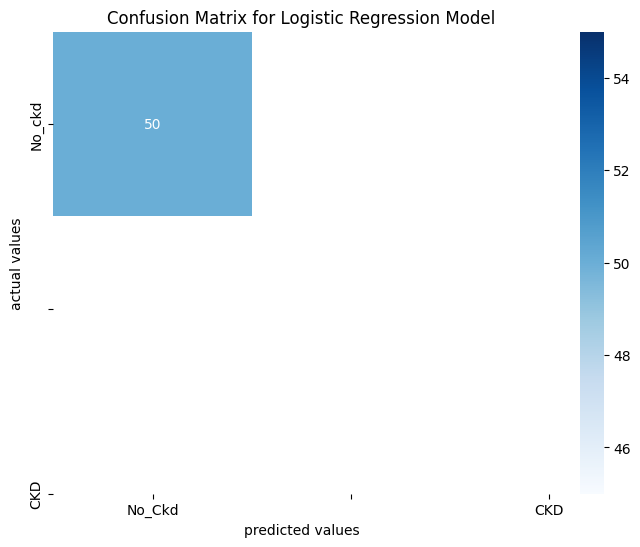

In [ ]:
plt.figure(figsize =(8,6))
sns.heatmap(cm, cmap = 'Blues', annot=True,xticklabels =['No_Ckd','','CKD'],yticklabels=['No_ckd','','CKD'])
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df =  final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace = True)
    bootstraps.append(bootstrap)

bootstrap_df =pd.concat(bootstraps,ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name = 'metrics',value_name='values')
time_metrics = ['fit_time','score_time']
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit = results_long_nofit.sort_values(by = 'values')
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by= 'values')

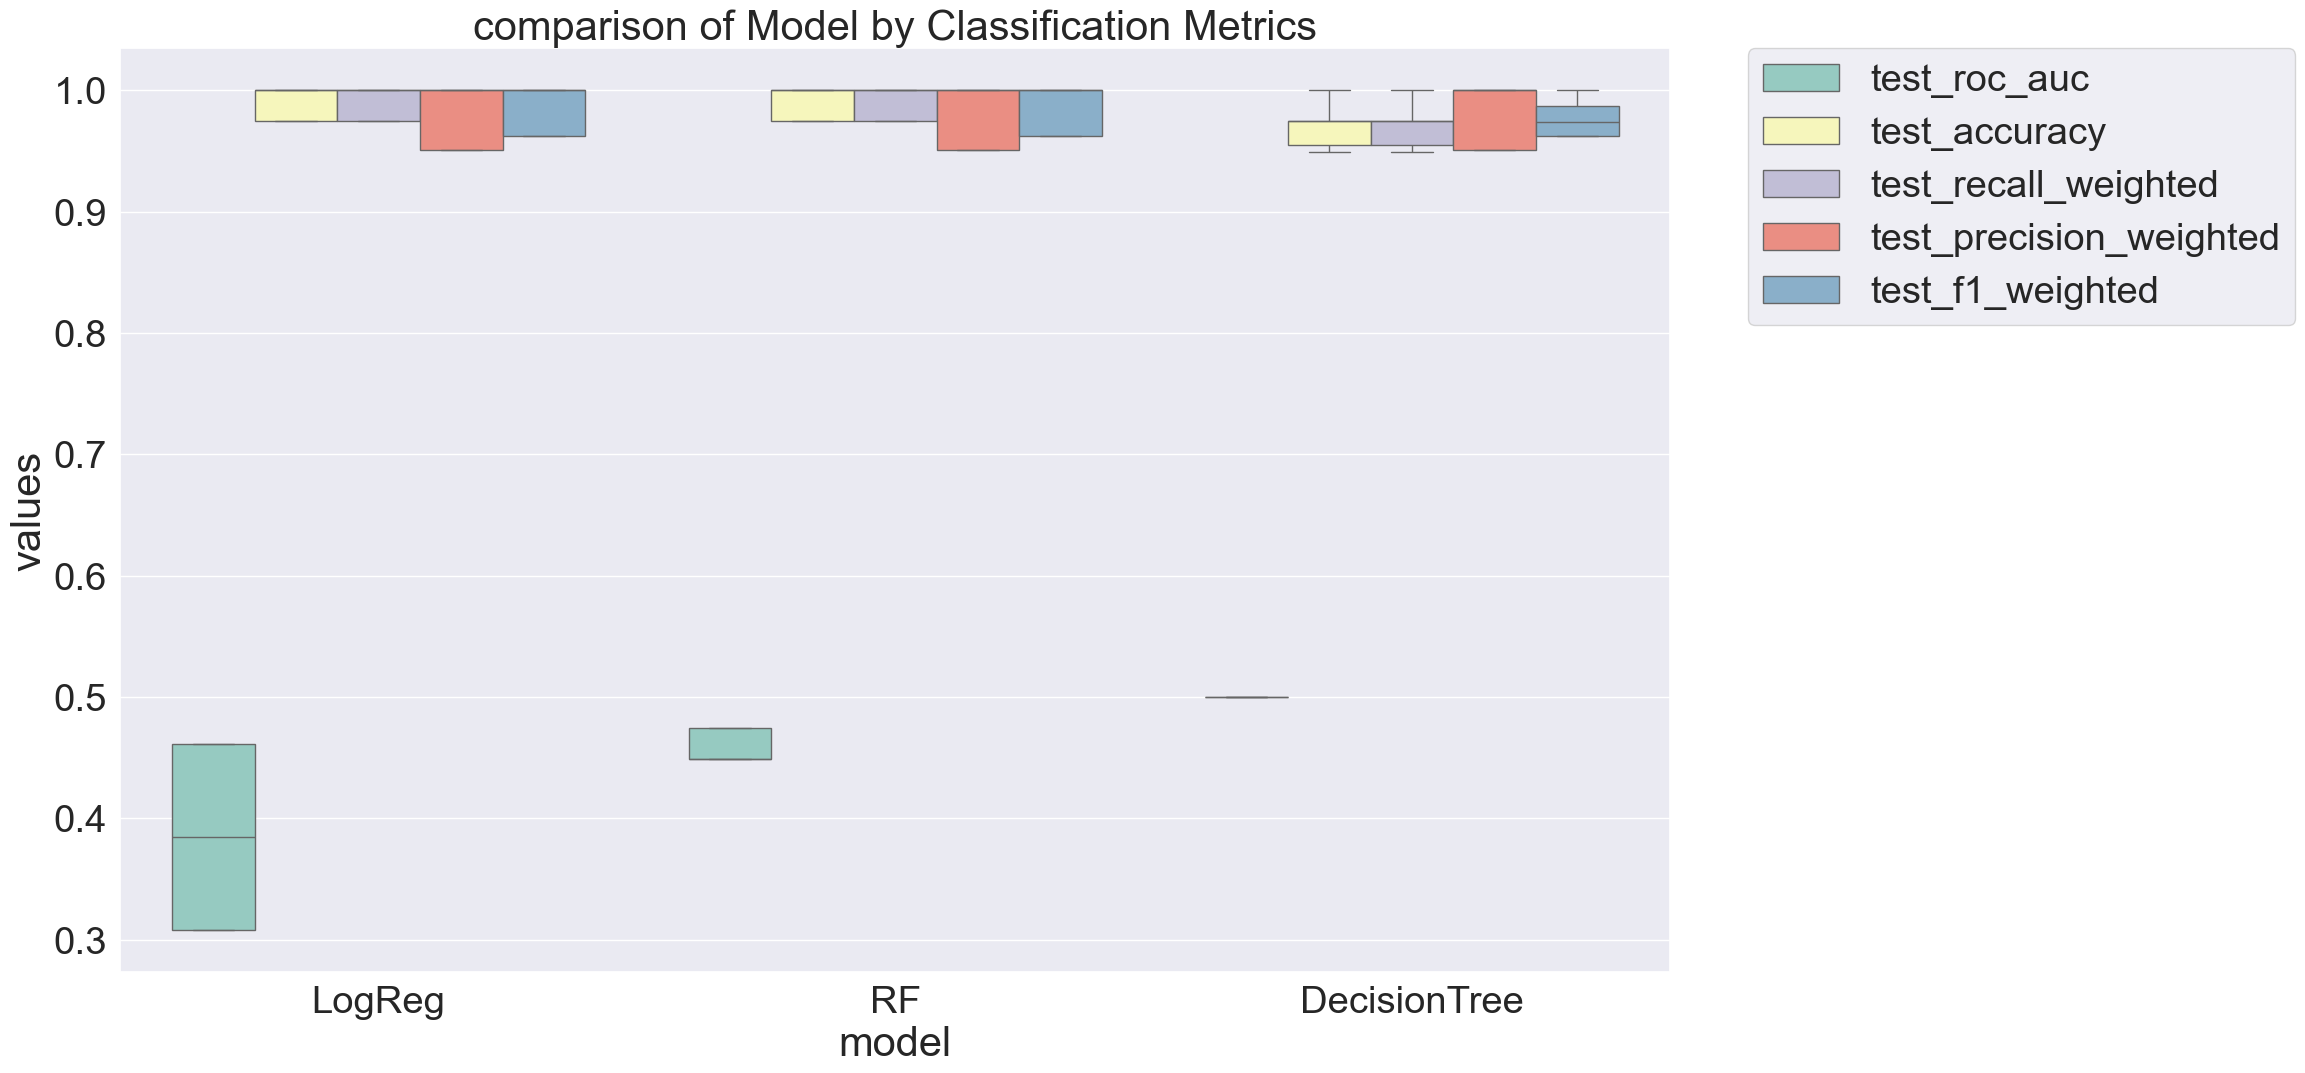

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g = sns.boxplot(x ="model",y="values",hue="metrics",data = results_long_nofit,palette="Set3")
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)
plt.title('comparison of Model by Classification Metrics')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [ ]:
import pickle
pickle.dump(lgr, open('CKD.pkl','wb'))

In [ ]:
data.to_csv('naan02.csv',index=False)